In [224]:
import pandas as pd
from matplotlib import pyplot as plt

In [225]:
df = pd.read_csv('cases_malaysia.csv')
df.head()

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,25/01/2020,4,4,0,4,0,4,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26/01/2020,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27/01/2020,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28/01/2020,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29/01/2020,3,3,0,7,0,3,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Define the start and end dates
start_date = '2021-03-10'
end_date = '2021-09-10'

# Filter the DataFrame by the date range
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Display the filtered DataFrame
filtered_df

C:\Users\HP\AppData\Local\Temp\ipykernel_888\193365688.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
410,2021-03-10,1448,10,2137,18006,765,1446,2,0,0,...,58,22,5,8.0,0.0,87.0,2.0,0.0,15.0,587.0
411,2021-03-11,1647,5,2104,17540,664,1628,19,0,0,...,87,25,9,0.0,2.0,88.0,4.0,0.0,116.0,399.0
412,2021-03-12,1575,7,2042,17070,444,1570,5,0,0,...,92,29,11,0.0,0.0,53.0,3.0,0.0,69.0,244.0
413,2021-03-13,1470,12,1830,16707,518,1453,17,0,0,...,86,27,15,0.0,0.0,53.0,0.0,0.0,89.0,270.0
414,2021-03-14,1354,14,1782,16275,431,1341,12,1,0,...,69,24,12,0.0,0.0,48.0,0.0,0.0,64.0,209.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,2021-09-06,17352,8,20201,252673,1758,7306,4077,5969,0,...,993,427,142,0.0,0.0,204.0,63.0,23.0,71.0,1015.0
591,2021-09-07,18547,18,18902,252007,2177,8142,4271,6134,0,...,1092,462,163,0.0,0.0,592.0,66.0,19.0,74.0,1082.0
592,2021-09-08,19733,3,22701,248678,2095,8191,4525,7017,0,...,1131,545,180,0.0,1.0,466.0,48.0,58.0,85.0,1038.0
593,2021-09-09,19307,6,24855,242808,1577,8020,4357,6930,0,...,1067,459,178,0.0,0.0,332.0,0.0,74.0,39.0,918.0


In [227]:
icu = pd.read_csv('icu.csv')
icu['date'] = pd.to_datetime(icu['date'])
result = icu.groupby('date')['icu_covid'].sum().reset_index()
start_date = '2021-03-10'
end_date = '2021-09-10'
icu_covid = result[(result['date'] >= start_date) & (result['date'] <= end_date)]
icu_covid

,date,icu_covid
351,2021-03-10,184
352,2021-03-11,179
353,2021-03-12,180
354,2021-03-13,183
355,2021-03-14,177
...,...,...
531,2021-09-06,1291
532,2021-09-07,1278
533,2021-09-08,1253
534,2021-09-09,1271


In [228]:
# Create a new DataFrame that's a deep copy of filtered_df
minmaxscaled_df = filtered_df.copy(deep=True)

In [229]:
from sklearn.preprocessing import MinMaxScaler

# Select the numerical columns (excluding 'date')
numerical_cols = filtered_df.select_dtypes(include=['int64', 'float64']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
minmaxscaled_df.loc[:, numerical_cols] = scaler.fit_transform(minmaxscaled_df[numerical_cols])

# Print the scaled DataFrame
print(minmaxscaled_df.head())

          date  cases_new  cases_import  cases_recovered  cases_active  \
410 2021-03-10   0.021430      0.156250         0.045582      0.015358   
411 2021-03-11   0.029842      0.078125         0.044196      0.013527   
412 2021-03-12   0.026799      0.109375         0.041591      0.011680   
413 2021-03-13   0.022360      0.187500         0.032685      0.010253   
414 2021-03-14   0.017457      0.218750         0.030668      0.008556   

     cases_cluster  cases_unvax  cases_pvax  cases_fvax  cases_boost  ...  \
410       0.137750     0.043993    0.000000    0.000000            0  ...   
411       0.104624     0.059479    0.002325    0.000000            0  ...   
412       0.032470     0.054544    0.000410    0.000000            0  ...   
413       0.056740     0.044588    0.002051    0.000000            0  ...   
414       0.028206     0.035058    0.001367    0.000126            0  ...   

     cases_60_69  cases_70_79  cases_80  cluster_import  cluster_religious  \
410     0.0197

C:\Users\HP\AppData\Local\Temp\ipykernel_888\501758404.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.02143038 0.02984191 0.02679855 0.0223603  0.0174571  0.01128582
 0.00515682 0.01175078 0.01149717 0.02684081 0.03085637 0.01631583
 0.00739707 0.01872517 0.01382196 0.01771071 0.01411785 0.0109054
 0.01525911 0.         0.00811565 0.02286753 0.01001775 0.01492096
 0.02946149 0.01724575 0.0054527  0.01517457 0.00836926 0.01454054
 0.0385916  0.02405106 0.03373066 0.01589314 0.03491419 0.04007101
 0.05101868 0.06805309 0.05875391 0.05300533 0.04805985 0.0591766
 0.05913433 0.08174825 0.08056471 0.07506974 0.07392848 0.07756361
 0.07574605 0.09303407 0.10106518 0.12033984 0.08200186 0.10470031
 0.06589737 0.09210415 0.11848001 0.11032209 0.15035083 0.15123848
 0.11801505 0.12114295 0.12815961 0.16163666 0.16544087 0.13407727
 0.13521853 0.12000169 0.14815284 0.16586356 0.21700905 0.24790768
 0.23467749 0.2273

In [230]:
df_merged = minmaxscaled_df.merge(icu_covid, on='date',how='left')
df_merged.head()

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace,icu_covid
0,2021-03-10,0.021430,0.156250,0.045582,0.015358,0.137750,0.043993,0.000000,0.000000,0,...,0.014109,0.009662,0.148148,0.000000,0.084367,0.010582,0.0,0.040650,0.255053,184
1,2021-03-11,0.029842,0.078125,0.044196,0.013527,0.104624,0.059479,0.002325,0.000000,0,...,0.019400,0.028986,0.000000,0.005571,0.085608,0.021164,0.0,0.314363,0.164581,179
2,2021-03-12,0.026799,0.109375,0.041591,0.011680,0.032470,0.054544,0.000410,0.000000,0,...,0.026455,0.038647,0.000000,0.000000,0.042184,0.015873,0.0,0.186992,0.089990,180
3,2021-03-13,0.022360,0.187500,0.032685,0.010253,0.056740,0.044588,0.002051,0.000000,0,...,0.022928,0.057971,0.000000,0.000000,0.042184,0.000000,0.0,0.241192,0.102502,183
4,2021-03-14,0.017457,0.218750,0.030668,0.008556,0.028206,0.035058,0.001367,0.000126,0,...,0.017637,0.043478,0.000000,0.000000,0.035980,0.000000,0.0,0.173442,0.073147,177


In [231]:
df = pd.DataFrame(minmaxscaled_df.loc[:, numerical_cols])

x_raw=df

# Load your Excel file
df = icu_covid

# Drop the first column (index 0)
df = df.drop(df.columns[0], axis=1)

y_raw = df

# Printing the scaled feature data, (x) data and target data, (y) data
print("Scaled Feature Data:")
print(x_raw)
print("\nTarget Data:")
print(y_raw)


Scaled Feature Data:
     cases_new  cases_import  cases_recovered  cases_active  cases_cluster  \
410   0.021430      0.156250         0.045582      0.015358       0.137750   
411   0.029842      0.078125         0.044196      0.013527       0.104624   
412   0.026799      0.109375         0.041591      0.011680       0.032470   
413   0.022360      0.187500         0.032685      0.010253       0.056740   
414   0.017457      0.218750         0.030668      0.008556       0.028206   
..         ...           ...              ...           ...            ...   
590   0.693677      0.125000         0.804478      0.937596       0.463431   
591   0.744188      0.281250         0.749905      0.934978       0.600853   
592   0.794319      0.046875         0.909507      0.921896       0.573959   
593   0.776312      0.093750         1.000000      0.898827       0.404067   
594   0.855313      0.062500         0.858043      0.896307       0.595933   

     cases_unvax  cases_pvax  cases_fvax  

In [232]:
x_raw.shape,y_raw.shape

((185, 30), (185, 1))

In [233]:
y_raw= y_raw.values.ravel()

In [234]:
from sklearn.model_selection import train_test_split

X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(x_raw, y_raw, test_size=0.2, random_state=21)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

In [235]:
# Method 1 : Random Forest
import time
from sklearn.ensemble import RandomForestRegressor

start_time_training_forest = time.time()
model = RandomForestRegressor(random_state = 21)
model.fit(X_train_forest, y_train_forest)
end_time_training_forest = time.time()
training_time_forest = end_time_training_forest-start_time_training_forest

start_time_prediction_forest = time.time()
y_pred_forest = model.predict(X_test_forest)
end_time_prediction_forest = time.time()
prediction_time_forest = end_time_prediction_forest-start_time_prediction_forest

# Evaluate the model
print("Mean Absolute Error     (MAE) :", mean_absolute_error(y_test_forest, y_pred_forest))
print("Mean Squared log Error  (MSLE):", mean_squared_log_error(y_test_forest, y_pred_forest))
print("Root Mean Squared Error (RMSE):", root_mean_squared_error(y_test_forest, y_pred_forest))
print("R² Score                      :", r2_score(y_test_forest, y_pred_forest))
print("Training time                 :",training_time_forest)
print("Prediction time               :",prediction_time_forest)

Mean Absolute Error     (MAE) : 24.738648648648663
Mean Squared log Error  (MSLE): 0.0017455940783398167
Root Mean Squared Error (RMSE): 36.35943905106499
R² Score                      : 0.9955432456692643
Training time                 : 0.19756197929382324
Prediction time               : 0.0072574615478515625


In [236]:
feature_importances = model.feature_importances_
feature_names = x_raw.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
importance_df.sort_values(by="Importance", ascending=False, inplace=True)

print(importance_df)

                    Feature  Importance
7                cases_fvax    0.241754
3              cases_active    0.199964
6                cases_pvax    0.172454
4             cases_cluster    0.087818
13                cases_0_4    0.074020
9               cases_child    0.056332
16              cases_18_29    0.046390
11              cases_adult    0.027994
0                 cases_new    0.020327
14               cases_5_11    0.020161
18              cases_40_49    0.018571
5               cases_unvax    0.015883
20              cases_60_69    0.003247
12            cases_elderly    0.003174
17              cases_30_39    0.002016
2           cases_recovered    0.001594
19              cases_50_59    0.001476
24        cluster_religious    0.001305
25        cluster_community    0.001084
22                 cases_80    0.000896
15              cases_12_17    0.000716
27        cluster_education    0.000677
21              cases_70_79    0.000528
28  cluster_detentionCentre    0.000417


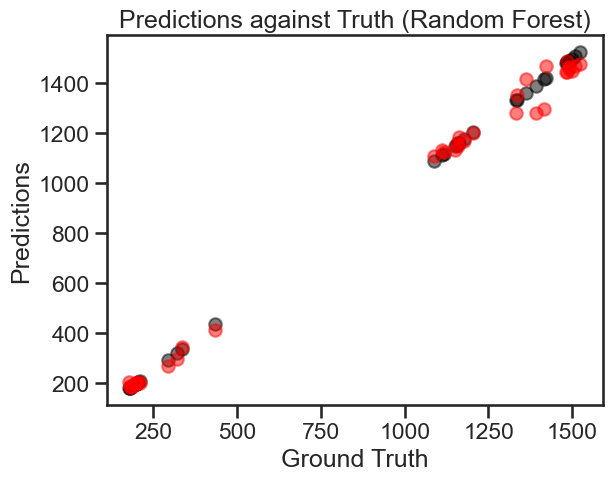

In [237]:
# Set Seaborn context, style, and color palette
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

# Create plot axes
ax = plt.axes()

# Scatter plot of ground truth (y_test) in black
ax.scatter(y_test_forest, y_test_forest, alpha=0.5, color='black', label='Ground Truth')

# Scatter plot of predictions (y_pred) in red
ax.scatter(y_test_forest, y_pred_forest, alpha=0.5, color='red', label='Predictions')


# Set axes and title for the plot
plt.title("Predictions against Truth (Random Forest)")
plt.xlabel("Ground Truth")
plt.ylabel("Predictions")

# Display the plot
plt.show()

In [238]:
# Split the data into training and testing set (20% testing)
X_train, X_test, y_train, y_test = train_test_split(x_raw, y_raw, test_size=0.2, random_state=42)

In [239]:
# test the shape of X_train, X_test, y_train, y_test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((148, 30), (37, 30), (148,), (37,))

In [240]:
# Method 2 : KNN regression
start_time_training_knn = time.time()
# Initialize KNeighborRegressor with neighbors count = 5
knn = KNeighborsRegressor(n_neighbors = 5)

# Train the KNN model
knn.fit(X_train, y_train)
end_time_training_knn = time.time()

training_time_knn = end_time_training_knn - start_time_training_knn

# Make predictions
y_train_pred = knn.predict(X_train)

start_time_prediction_knn = time.time()
y_test_pred = knn.predict(X_test)
end_time_prediction_knn = time.time()
prediction_time_knn = end_time_prediction_knn - start_time_prediction_knn

# Evaluate the model
print("Mean Absolute Error     (MAE) :", mean_absolute_error(y_test, y_test_pred))
print("Mean Squared log Error  (MSLE):", mean_squared_log_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE):", root_mean_squared_error(y_test, y_test_pred))
print("R² Score                      :", r2_score(y_test, y_test_pred))
print("Training time                 :",training_time_knn)
print("Prediction time               :",prediction_time_knn)

# Calculate mean squared logarithmic error
msle_train = mean_squared_log_error(y_train, y_train_pred)
msle_test = mean_squared_log_error(y_test, y_test_pred)

# Merge the results into a DataFrame
result_df = pd.DataFrame({
    'Train MSLE': [msle_train],
    'Test MSLE': [msle_test],
})

# Print the DataFrame
result_df

Mean Absolute Error     (MAE) : 41.459459459459445
Mean Squared log Error  (MSLE): 0.008942692419683436
Root Mean Squared Error (RMSE): 58.26587708455466
R² Score                      : 0.9863479816890677
Training time                 : 0.0025157928466796875
Prediction time               : 0.009474992752075195


,Train MSLE,Test MSLE
0,0.004037,0.008943


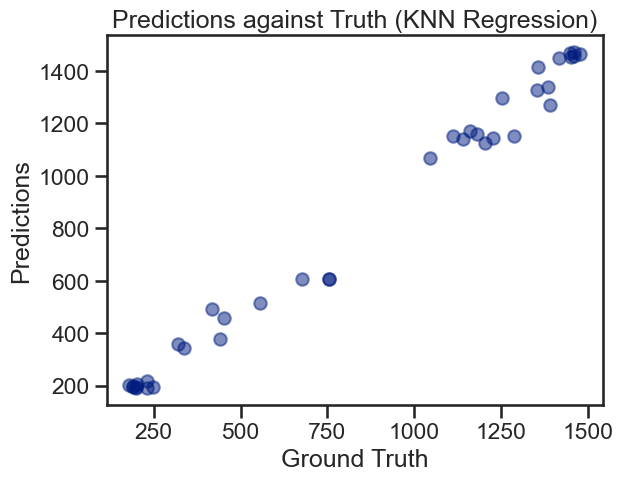

In [241]:
# Set Seaborn context, style, and color palette
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

# Create plot axes
ax = plt.axes()

# Scatter plot of ground truth vs. predictions
ax.scatter(y_test, y_test_pred, alpha=0.5)

# Set axes and title for the plot
plt.title("Predictions against Truth (KNN Regression)")
plt.xlabel("Ground Truth")
plt.ylabel("Predictions")

# Display the plot
plt.show()

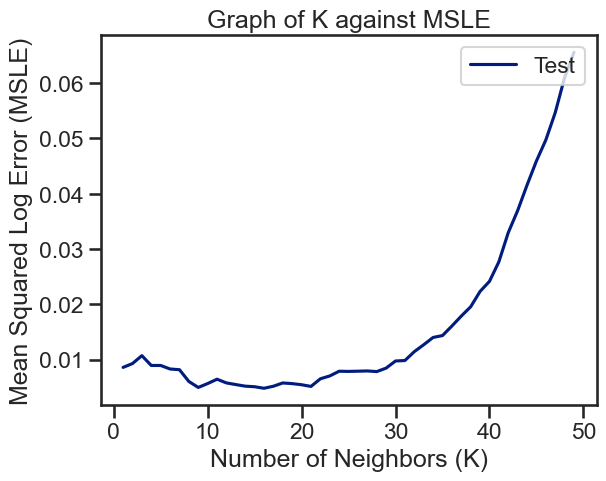

Best k: 16


In [242]:
# Store values for plotting
k_values = []
test_errors = []

# Iterate K values and calculate test errors
for i in range(1, 50):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)   
    y_test_pred = knn.predict(X_test) 

    k_values.append(i)
    test_errors.append(mean_squared_log_error(y_test, y_test_pred))
    
# Set axes and titile for the graph
plt.plot(k_values, test_errors)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Log Error (MSLE)')
plt.title('Graph of K against MSLE')
plt.legend(['Test'], loc='upper right')

#D Display
plt.show()

best_k = k_values[test_errors.index(min(test_errors))]
print("Best k:", best_k)

In [243]:
#Best k = 16, hence repeat the process using k = 16

knn = KNeighborsRegressor(n_neighbors = 16)
knn.fit(X_train, y_train)

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Evaluate the model
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("Mean Squared Log Error (MSLE):", mean_squared_log_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE):", root_mean_squared_error(y_test, y_test_pred))
print("R² Score:", r2_score(y_test, y_test_pred))

# Calculate mean squared logarithmic error
msle_train = mean_squared_log_error(y_train, y_train_pred)
msle_test = mean_squared_log_error(y_test, y_test_pred)

# Merge the results into a DataFrame
result_df = pd.DataFrame({
    'Train MSLE': [msle_train],
    'Test MSLE': [msle_test],
})

# Print the DataFrame
result_df

Mean Absolute Error (MAE): 36.60304054054054
Mean Squared Log Error (MSLE): 0.004815065556296399
Root Mean Squared Error (RMSE): 52.626906823321285
R² Score: 0.9888625959604523


,Train MSLE,Test MSLE
0,0.007034,0.004815


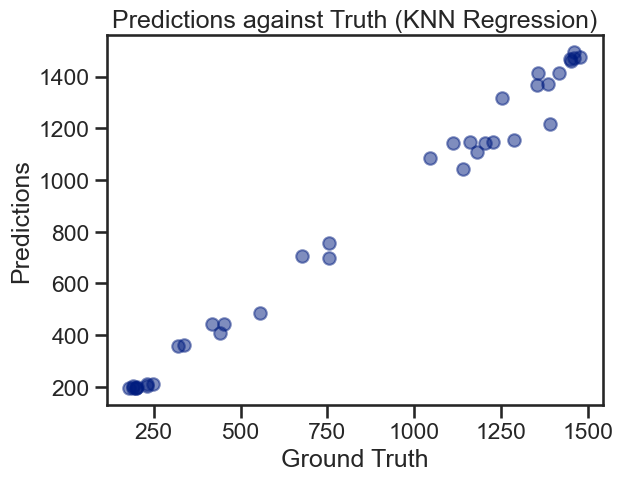

In [244]:
# Set Seaborn context, style, and color palette
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

# Create plot axes
ax = plt.axes()

# Scatter plot of ground truth vs. predictions
ax.scatter(y_test, y_test_pred, alpha=0.5)

# Set axes and title for the plot
plt.title("Predictions against Truth (KNN Regression)")
plt.xlabel("Ground Truth")
plt.ylabel("Predictions")

# Display the plot
plt.show()

In [245]:
# Method 3 : neural network

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.preprocessing import StandardScaler

# Assuming filtered_df is your DataFrame with features, and icu_covid is your target

# Split into train, validation, and test sets (assuming you've done this)

X_train_nn, X_temp, y_train_nn, y_temp = train_test_split(x_raw, y_raw, test_size=0.3, random_state=42)
X_val, X_test_nn, y_val, y_test_nn     = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [246]:
# Checking the shape of the datasets
X_train_nn.shape,X_temp.shape

((129, 30), (56, 30))

In [247]:
X_val.shape,X_test_nn.shape

((28, 30), (28, 30))

In [248]:
# Normalize the data
scaler = StandardScaler()
X_train_nn_scaled = scaler.fit_transform(X_train_nn)  # Fit on training data and transform
X_val_nn_scaled = scaler.transform(X_val)             # Transform validation data
X_test_nn_scaled = scaler.transform(X_test_nn)        # Transform test data

Epoch 1/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1205246.0000 - root_mean_squared_error: 1095.5409 - val_loss: 1203772.7500 - val_root_mean_squared_error: 1097.1658
Epoch 2/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 1123741.6250 - root_mean_squared_error: 1058.7117 - val_loss: 928237.8125 - val_root_mean_squared_error: 963.4510
Epoch 3/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 710851.3750 - root_mean_squared_error: 842.1028 - val_loss: 476704.0938 - val_root_mean_squared_error: 690.4376
Epoch 4/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 385614.1875 - root_mean_squared_error: 619.1862 - val_loss: 377031.9062 - val_root_mean_squared_error: 614.0292
Epoch 5/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 341817.0312 - root_mean_squared_error: 581.5679 - val_loss: 343956.0625 - val_root_mean_squared_error: 586.4777
Epoch 6/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - loss: 351852.0938 - root_mean_squared_error: 592.0397 - val_loss: 310263.5

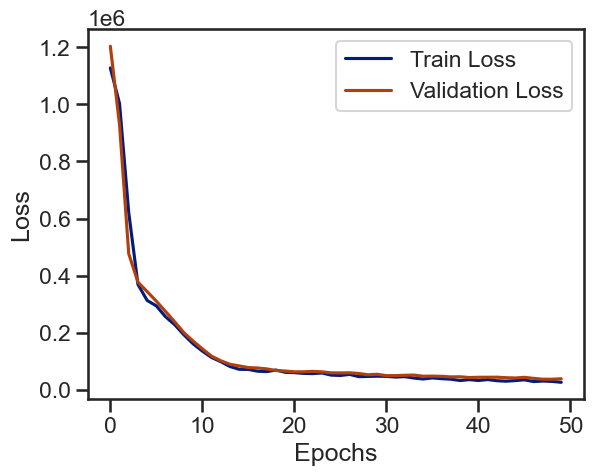

In [249]:
# Define the neural network model
model = Sequential([
    Input(shape=(X_train_nn_scaled.shape[1],)),  # Define input shape
    Dense(64, activation='relu'),  # First hidden layer
    Dropout(0.2),  # Dropout for regularization
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error',metrics= [RootMeanSquaredError()])

start_time_training_nn = time.time()

# Train the model
history = model.fit(X_train_nn_scaled, y_train_nn, epochs=50, batch_size=1, validation_data=(X_val_nn_scaled, y_val))
end_time_training_nn = time.time()
training_time_nn = end_time_training_nn - start_time_training_nn

# Evaluate the model on the test set
start_time_prediction_nn = time.time()
y_pred_nn = model.predict(X_test_nn_scaled)
end_time_prediction_nn = time.time()
prediction_time_nn = end_time_prediction_nn - start_time_prediction_nn
rmse_nn_test = root_mean_squared_error(y_test_nn, y_pred_nn)
r2square = r2_score(y_test_nn, y_pred_nn)
mae = mean_absolute_error(y_test_nn, y_pred_nn)
msle = mean_squared_log_error(y_test_nn, y_pred_nn)

# Print the evaluation metrics and timings
print(f'Neural Network Test RMSE:       {rmse_nn_test}')
print(f'Neural Network Test MAE:        {mae}')
print(f'Neural Network Test MSLE:       {msle}')
print(f'Neural Network Test r2square:   {r2square}')
print(f'Neural Network Training time:   {training_time_nn}')
print(f'Neural Network Prediction time: {prediction_time_nn}')


# Optionally, plot the training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [250]:
# Method 4: Linear regression
X_train_linear,X_test_linear,y_train_linear,y_test_linear = train_test_split(x_raw,y_raw,test_size = 0.2,random_state = 22)

In [251]:
from sklearn.linear_model import LinearRegression

In [252]:
X_train_linear.shape, X_test_linear.shape,y_train_linear.shape, y_test_linear.shape

((148, 30), (37, 30), (148,), (37,))

In [253]:
import numpy as np
X_train_linear = np.array(X_train_linear).reshape(-1,30)

start_time_training_linear = time.time()
lr = LinearRegression()
lr.fit(X_train_linear,y_train_linear)
end_time_training_linear = time.time()
training_time_linear = end_time_training_linear - start_time_training_linear

# 30 dimensionality of m 
c = lr.intercept_
m = lr.coef_
m,c

(array([-1.03109298e+15,  1.33437500e+02,  5.75100742e+02,  1.70015188e+03,
         5.27846213e+02,  5.12190579e+14,  3.18724447e+14,  3.47097156e+14,
         6.25000000e-02,  6.45594495e+01,  3.39963077e+01,  2.93669328e+02,
        -1.63310570e+05,  9.93299152e+02, -5.43117117e+02,  3.50041202e+01,
         1.04378149e+03, -1.11351562e+02,  1.02468750e+03, -2.18995312e+03,
         9.97996719e+04,  4.92923203e+04,  1.79853984e+04, -3.04925690e+02,
        -1.25954102e+02,  1.15101562e+02, -4.45781250e+01, -1.35041016e+02,
        -2.65722656e+01,  1.73902344e+02]),
 -435832692098.93555)

In [254]:
y_pred_train_linear = lr.predict(X_train_linear)

In [255]:
X_test_linear = np.array(X_test_linear).reshape(-1,30)

In [256]:
y_pred_test_linear = np.dot(X_test_linear,m)+c
y_pred_test_linear.flatten()

array([1324.96124268, 1212.14599609,  955.27593994,  314.16241455,
       1659.52880859, 1685.97613525, 1626.23480225, 1611.41088867,
        229.81689453, 1431.6027832 , 1378.96270752,  185.12078857,
        376.54486084,  808.60693359, 1469.65686035, 1329.90106201,
       1132.13275146,  263.08459473,  274.99963379, 1497.37414551,
        288.50622559, 1305.34350586, 1108.37176514,  799.5145874 ,
       1386.81524658,  218.60021973, 1030.43499756, 1282.32446289,
        202.28570557, 1708.14105225, 1126.98468018, 1341.11010742,
       1439.87762451,  886.05157471,  358.82519531,  427.54864502,
        237.77722168])

In [257]:
start_time_prediction_linear = time.time()
y_pred_test_linear1 = lr.predict(X_test_linear)
end_time_prediction_linear = time.time()
prediction_time_linear = end_time_prediction_linear - start_time_prediction_linear
y_pred_test_linear1

array([1324.96124268, 1212.14599609,  955.27593994,  314.16241455,
       1659.52880859, 1685.97613525, 1626.23480225, 1611.41088867,
        229.81689453, 1431.6027832 , 1378.96270752,  185.12078857,
        376.54486084,  808.60693359, 1469.65686035, 1329.90106201,
       1132.13275146,  263.08459473,  274.99963379, 1497.37414551,
        288.50622559, 1305.34350586, 1108.37176514,  799.5145874 ,
       1386.81524658,  218.60021973, 1030.43499756, 1282.32446289,
        202.28570557, 1708.14105225, 1126.98468018, 1341.11010742,
       1439.87762451,  886.05157471,  358.82519531,  427.54864502,
        237.77722168])

In [258]:
print("------------------Train result----------------------------------")
print(f'R squared:     {r2_score(y_train_linear, y_pred_train_linear)}')
print(f'     RMSE:     {root_mean_squared_error(y_train_linear, y_pred_train_linear)}')
print(f'      MSE:     {mean_squared_log_error(y_train_linear, y_pred_train_linear)}')
print("Training time:",training_time_linear)

print()

print("------------------Test result----------------------------------")
print(f'R squared:       {r2_score(y_test_linear, y_pred_test_linear1)}')
print(f'     RMSE:       {root_mean_squared_error(y_test_linear, y_pred_test_linear1)}')
print(f'      MSE:       {mean_squared_log_error(y_test_linear, y_pred_test_linear1)}')
print("Prediction time:",prediction_time_linear)

------------------Train result----------------------------------
R squared:     0.9709125884703507
     RMSE:     82.92738326141072
      MSE:     0.020839919770570838
Training time: 0.0020546913146972656

------------------Test result----------------------------------
R squared:       0.9396672089853171
     RMSE:       125.77490396022388
      MSE:       0.024566405343645882
Prediction time: 0.0009984970092773438


In [259]:
pred_y_linear_df = pd.DataFrame({'Actual value': y_test_linear,'Predicted value':y_pred_test_linear1,'Difference':y_test_linear-y_pred_test_linear1})
# it has 30 rows with 30 different of m describing 30 different input features, with 37 data being trained for 30 input features
pred_y_linear_df[0:]  

,Actual value,Predicted value,Difference
0,1289,1324.961243,-35.961243
1,1271,1212.145996,58.854004
2,1107,955.275940,151.724060
3,327,314.162415,12.837585
4,1462,1659.528809,-197.528809
5,1460,1685.976135,-225.976135
6,1521,1626.234802,-105.234802
7,1423,1611.410889,-188.410889
8,231,229.816895,1.183105
9,1537,1431.602783,105.397217


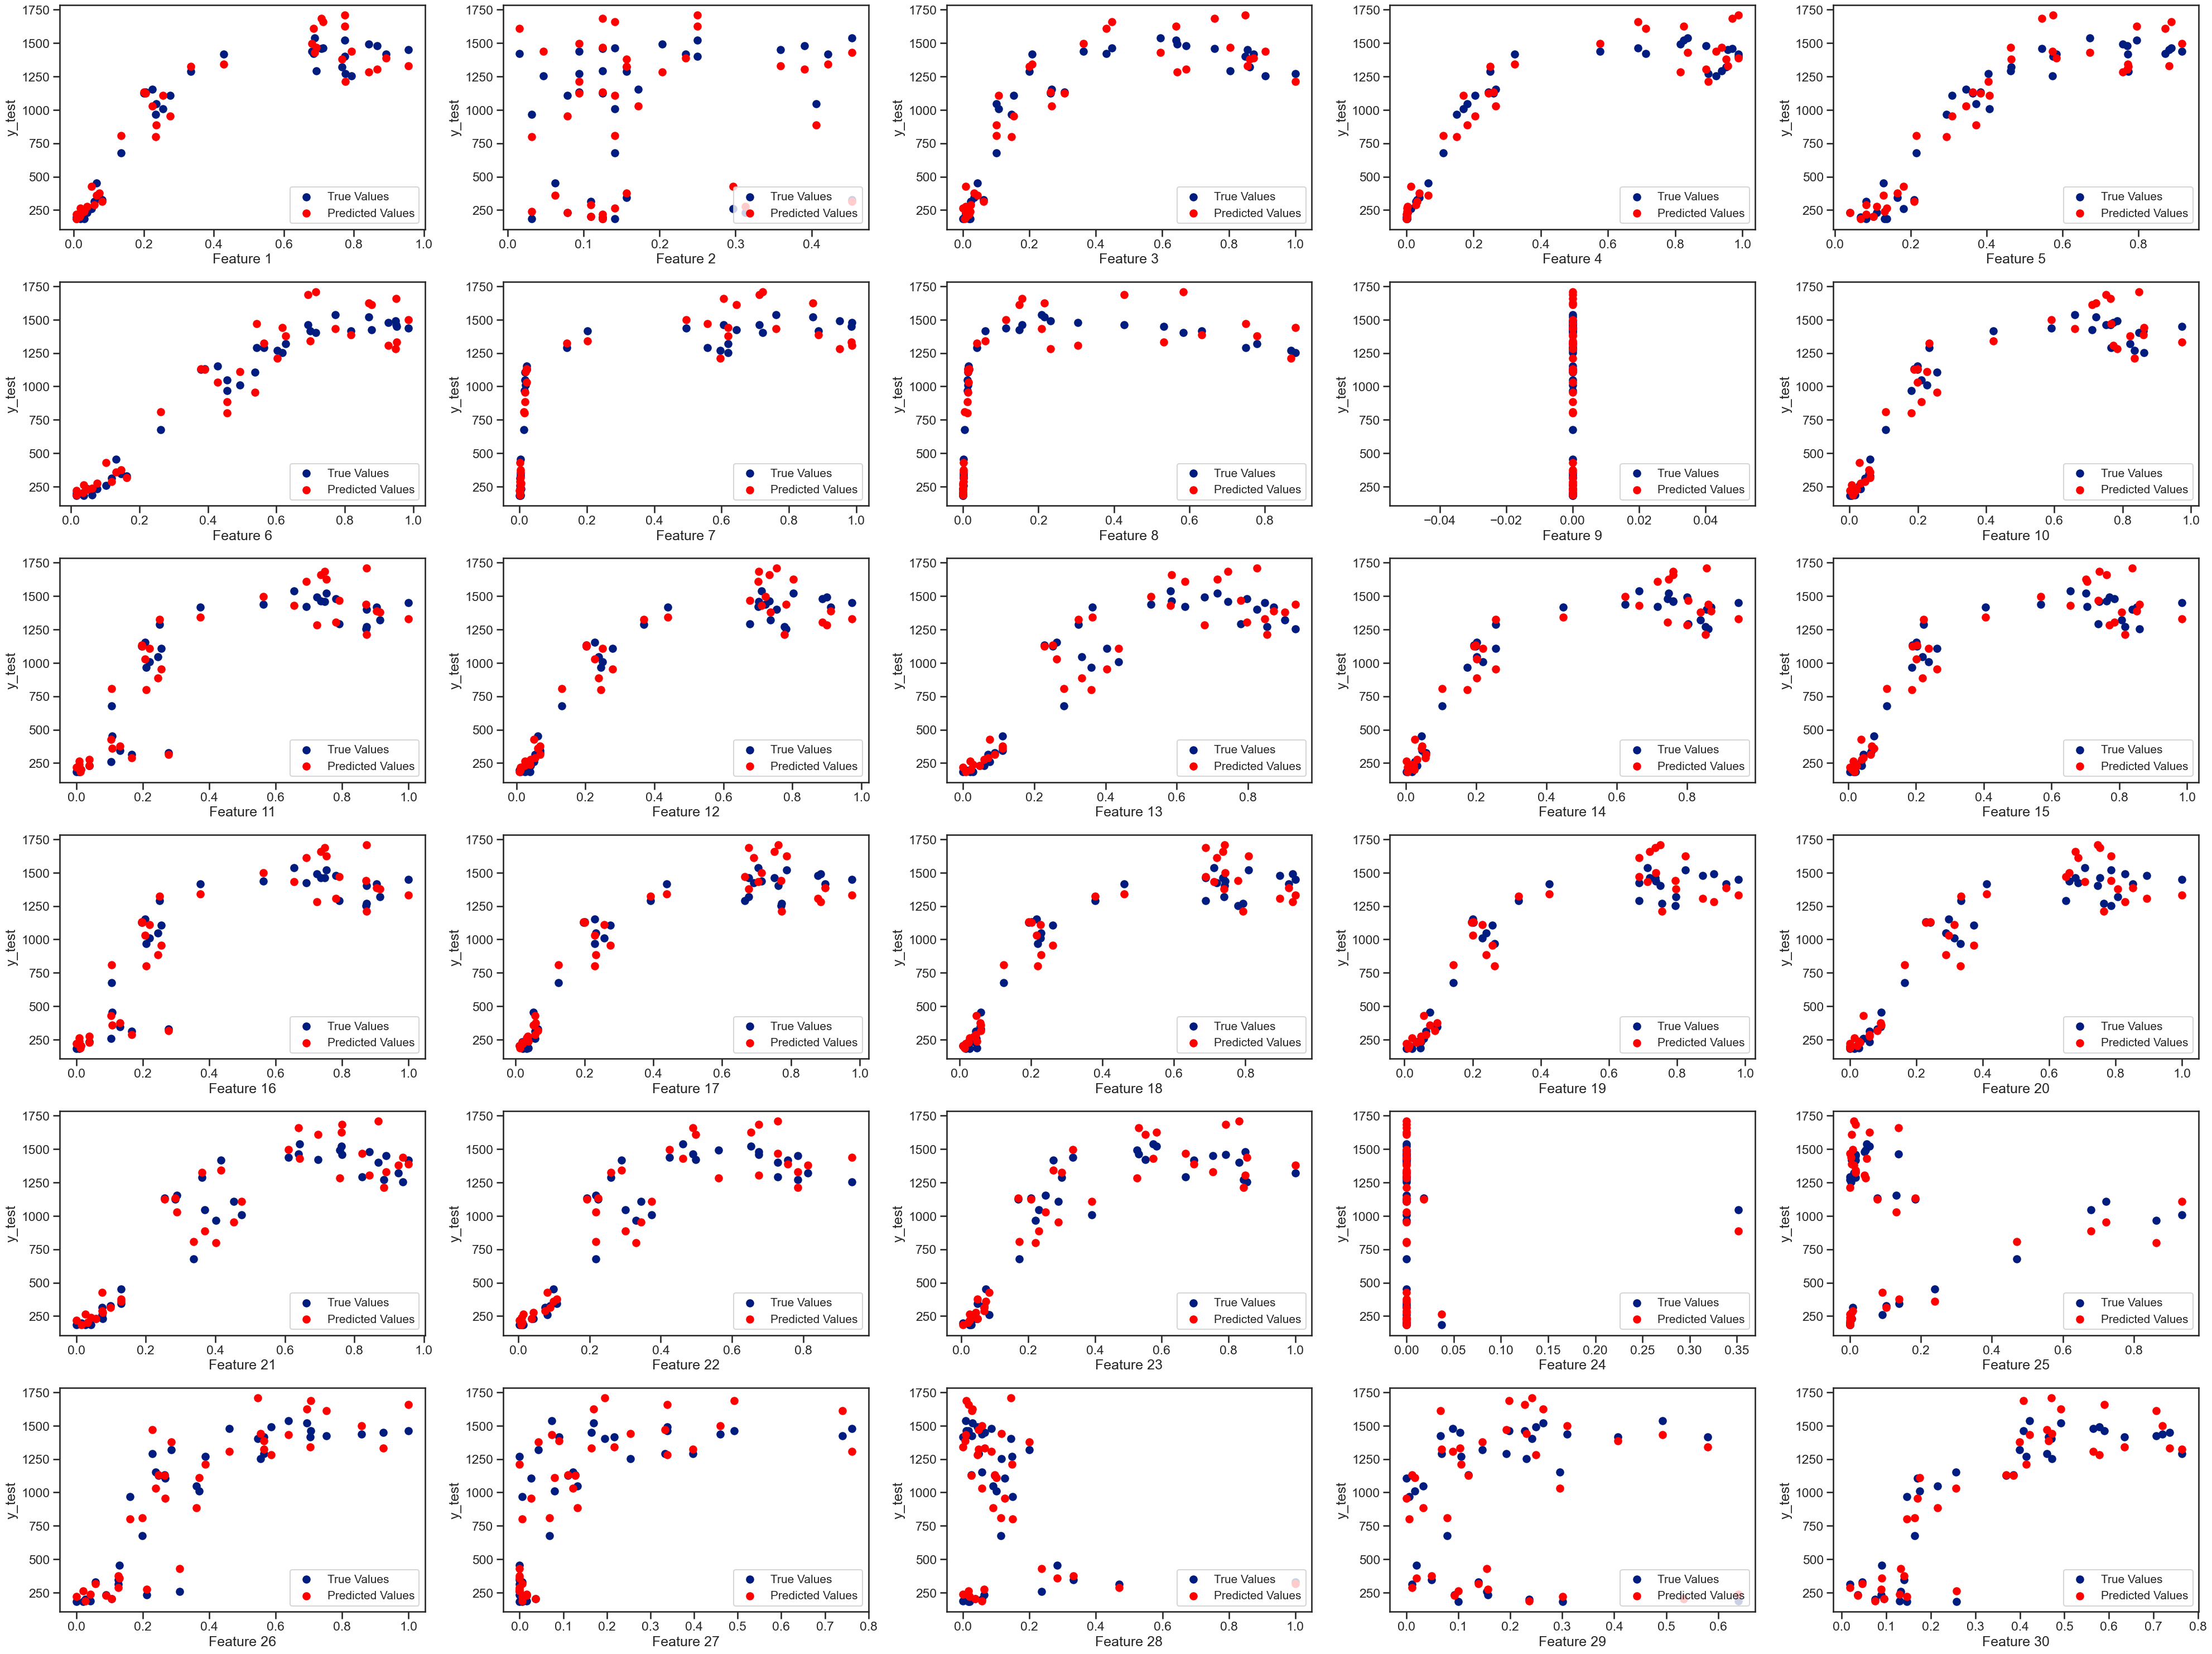

In [260]:
import matplotlib.pyplot as plt
# Assuming X_train_linear has multiple features and y_train_linear is the target

n_features = X_test_linear.shape[1]  # Number of features
n_cols = 5
n_rows = int(np.ceil(n_features/n_cols))  # Calculate the number of rows needed

fig, axs = plt.subplots(n_rows,n_cols, figsize=(40, 30))

# Loop through each feature and create a scatter plot
num = 0
for i in range(n_rows):
    for j in range(n_cols):
        axs[i,j].scatter(X_test_linear[:, num], y_test_linear, label="True Values")
        axs[i,j].scatter(X_test_linear[:, num], y_pred_test_linear, color="red", label="Predicted Values")
        axs[i,j].set_xlabel(f"Feature {num+1}")
        axs[i,j].set_ylabel("y_test")
        axs[i,j].legend(loc = "lower right",ncol=1,fontsize = "small")
        num = num+1

# Adjust layout
plt.tight_layout()
plt.show()